In [2]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader,TensorDataset
from torchvision import datasets,transforms
import torch.optim as optim
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
train_data=datasets.CIFAR10(root='./',
                          train=True,transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize(0.5,0.5,0.5)
                          ]),
                          download=True
                          )
train_loader=DataLoader(dataset=train_data,batch_size=64,shuffle=True)

test_data=datasets.CIFAR10(root='./',
                          train=False,transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize(0.5,0.5,0.5)
                          ])                      
                          )
test_loader=DataLoader(dataset=test_data,batch_size=64,shuffle=True)

Files already downloaded and verified


torch.Size([64, 3, 32, 32])
torch.Size([64])


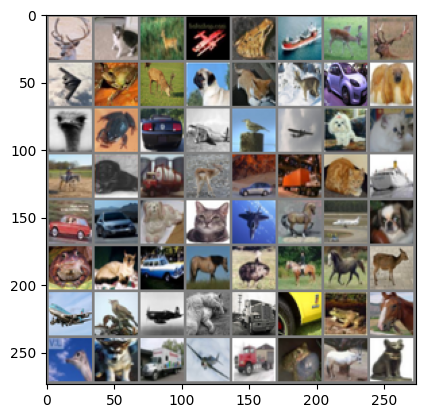

 deer   cat  deer plane  frog  ship  deer  deer plane  frog  deer   dog   cat  deer   car   dog  bird  frog   car plane  bird plane   dog   cat horse   dog truck  deer   car truck   cat  ship   car   car   dog   cat plane horse plane   dog  frog   cat   car horse  bird horse horse  deer plane  bird plane   cat truck   car  frog horse  bird   dog truck plane truck  frog horse   cat


In [4]:
import torchvision
# 十个类别
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')
batchsize=64
 
def imshow(img):
    img = img / 2 + 0.5 # 逆正则化
    np_img = img.numpy()  # tensor --> numpy
    plt.imshow(np.transpose(np_img,(1,2,0)))  # 改变通道顺序
    plt.show()
    
# 随机获取一批数据
imgs,labs = next(iter(train_loader))
 
 
print(imgs.shape)
print(labs.shape)
    
#调用方法
imshow(torchvision.utils.make_grid(imgs))
 
# 输出这批图片对应的标签
print(' '.join('%5s' % classes[labs[i]] for i in range(batchsize))) 

In [8]:
for i,data in enumerate(train_loader):
    if i!=0:
        break
    print(len(data))
    print(data[0].shape)
    print(data[1].shape)
    
    conv1=nn.Conv2d(in_channels=3, out_channels=6,kernel_size=(3,3),padding=1)
    bn1=nn.BatchNorm2d(6)
    pool1=nn.MaxPool2d(kernel_size=(2,2))
    conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=(3,3),padding=1)
    pool2=nn.MaxPool2d(kernel_size=(2,2))
    conv3=nn.Conv2d(in_channels=12,out_channels=24,kernel_size=(3,3),padding=2)
    pool3=nn.MaxPool2d(kernel_size=(2,2))
    
    y=conv1(data[0])
    print(y.shape)
    y=bn1(y)
    print(y.shape)
    y=F.relu(y)
    y=pool1(y)
    print(y.shape)
    y1=conv2(y)
    print(y1.shape)
    y2=pool2(y1)
    print(y2.shape)
    y3=conv3(y2)
    print(y3.shape)
    y3=pool3(y3)
    print(y3.shape)

2
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 6, 32, 32])
torch.Size([64, 6, 32, 32])
torch.Size([64, 6, 16, 16])
torch.Size([64, 12, 16, 16])
torch.Size([64, 12, 8, 8])
torch.Size([64, 24, 10, 10])
torch.Size([64, 24, 5, 5])


In [9]:
class model(nn.Module):
    
    def __init__(self):
        super().__init__()
        # input=3*32*32
        self.conv1=nn.Conv2d(in_channels=3, out_channels=6,kernel_size=(3,3),padding=1)#(64,6,32,32)
        self.bn1=nn.BatchNorm2d(6)
        self.pool1=nn.MaxPool2d(kernel_size=(2,2))#(64,6,16,16)
        
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=(3,3),padding=1)#(64,12,16,16)
        self.bn2=nn.BatchNorm2d(12)
        self.pool2=nn.MaxPool2d(kernel_size=(2,2))#(64,12,8,8)
        
        self.conv3=nn.Conv2d(in_channels=12,out_channels=24,kernel_size=(3,3),padding=2)#(64,24,10,10)
        self.bn3=nn.BatchNorm2d(24)
        self.pool3=nn.MaxPool2d(kernel_size=(2,2))#(64,24,5,5)
        
        self.fc1=nn.Linear(in_features=24*5*5,out_features=256)
        self.fc2=nn.Linear(in_features=256,out_features=10)
        
        
        
    def forward(self,x):
        x=self.conv1(x)
        x=self.bn1(x)
        x=F.relu(x)
        x=self.pool1(x)
        
        x=self.conv2(x)
        x=self.bn2(x)
        x=F.relu(x)
        x=self.pool2(x)
        
        x=self.conv3(x)
        x=self.bn3(x)
        x=F.relu(x)
        x=self.pool3(x)
        
        x=x.view(-1,24*5*5)
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        
        return x        

In [10]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [34]:
net=model().to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [35]:
print(net)

model(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=600, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [36]:
train_count=0
for i,data in enumerate(train_loader):
    train_count+=1
    
test_count=0
for i,data in enumerate(test_loader):
    test_count+=1

print(train_count,test_count)

782 157


In [37]:
epoch_num=120

losses=[]
for epoch in range(epoch_num):
    for i,data in enumerate(train_loader):
        x,y=data
        net.train()
        pred=net(x.to(device))
        loss=loss_fn(pred,y.to(device))
        
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    print(epoch," : ",loss)
    losses.append(loss.data)

0  :  tensor(1.3748, device='cuda:0', grad_fn=<NllLossBackward>)
1  :  tensor(1.3849, device='cuda:0', grad_fn=<NllLossBackward>)
2  :  tensor(0.9268, device='cuda:0', grad_fn=<NllLossBackward>)
3  :  tensor(1.1803, device='cuda:0', grad_fn=<NllLossBackward>)
4  :  tensor(0.8190, device='cuda:0', grad_fn=<NllLossBackward>)
5  :  tensor(0.9096, device='cuda:0', grad_fn=<NllLossBackward>)
6  :  tensor(0.7953, device='cuda:0', grad_fn=<NllLossBackward>)
7  :  tensor(0.8705, device='cuda:0', grad_fn=<NllLossBackward>)
8  :  tensor(0.7871, device='cuda:0', grad_fn=<NllLossBackward>)
9  :  tensor(0.9848, device='cuda:0', grad_fn=<NllLossBackward>)
10  :  tensor(0.4783, device='cuda:0', grad_fn=<NllLossBackward>)
11  :  tensor(1.4554, device='cuda:0', grad_fn=<NllLossBackward>)
12  :  tensor(0.5483, device='cuda:0', grad_fn=<NllLossBackward>)
13  :  tensor(0.5538, device='cuda:0', grad_fn=<NllLossBackward>)
14  :  tensor(0.7337, device='cuda:0', grad_fn=<NllLossBackward>)
15  :  tensor(0.3858

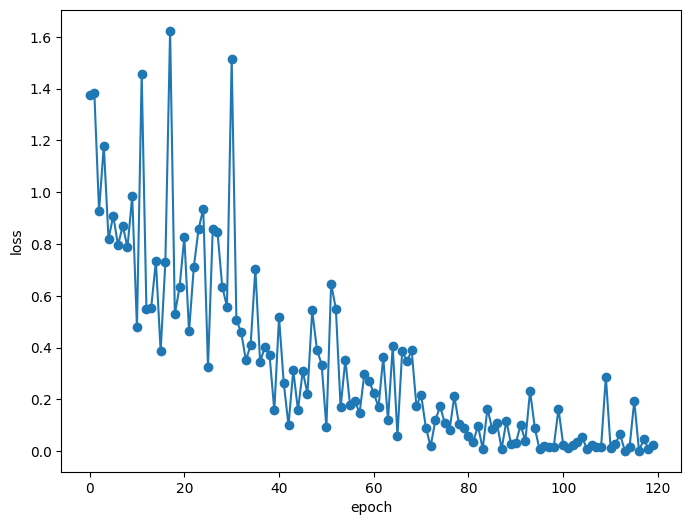

In [38]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [39]:
rights=0
length=0

def rightness(pred,labels):
    pred=torch.max(pred.data, 1)[1]
    rights=pred.eq(labels.data.view_as(pred)).sum()
    return rights,len(labels)

for i,data in enumerate(test_loader):
    x,y=data
    net.eval()#dropout 关闭
    pred=net(x.to(device))
    rights=rights+rightness(pred,y.to(device))[0]
    length=length+rightness(pred,y.to(device))[1]
    
print(rights,length,rights/length)

tensor(7112, device='cuda:0') 10000 tensor(0.7112, device='cuda:0')


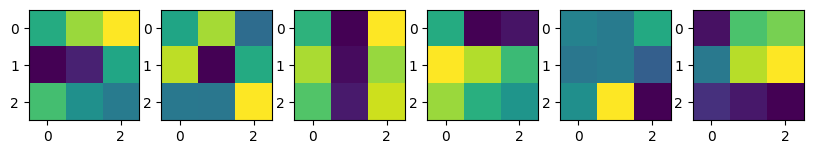

AttributeError: 'model' object has no attribute 'feature_maps'

In [40]:
torch.save(net.state_dict(), mymodel.pth)
